# Assignment 3
Name: Mike Mico

StdId: 3685120

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

df = pd.read_csv('loan_history_almost_clean.csv')

In [2]:
import sklearn
from sklearn.model_selection import train_test_split

# import a whole bunch of regression models (classify to a range)
# vanilla linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# decision tree
from sklearn.tree import DecisionTreeRegressor
# random forest
from sklearn.ensemble import RandomForestRegressor
# gradient boost
from sklearn.ensemble import GradientBoostingRegressor
# elastic net
from sklearn.linear_model import ElasticNet
# stochastic gradient descent regression
from sklearn.linear_model import SGDRegressor
# support vector machine
from sklearn import svm
from sklearn.svm import SVC
# bayesian ridge regression
from sklearn.linear_model import BayesianRidge
# kernel ridge
from sklearn.kernel_ridge import KernelRidge
# xgboost
from xgboost.sklearn import XGBRegressor
# LGBM
from lightgbm import LGBMRegressor

# measuring how we do 
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# scaler
from sklearn.preprocessing import StandardScaler

In [3]:
df

,default,amount_of_loan,credit_rating,years_with_bank,rent_mortgage_own,income,age
0,0,1000,B,2.0,0,19200.0,24
1,1,6500,A,2.0,1,66000.0,28
2,0,2400,A,2.0,0,60000.0,36
3,0,10000,C,3.0,0,62000.0,24
4,1,4000,C,2.0,0,20000.0,28
...,...,...,...,...,...,...,...
7722,1,6000,C,6.0,0,47628.0,24
7723,1,1500,B,5.0,0,18000.0,21
7724,1,4100,B,18.0,0,57000.0,26
7725,1,2000,B,3.0,0,25000.0,25


In [4]:
df.shape

(7727, 7)

In [5]:
# we need everything to be numerical for a decision tree to work: 

# map yes and no to 1 and 0 
# map the three education levels to 0, 1, and 2

d = {'A': 7, 'B': 6,'C': 5, 'D': 4,'E': 3, 'F': 2,'G': 1}
df['credit_rating'] = df['credit_rating'].map(d)

# Confusion matrix to find strong corelations

<Axes: >

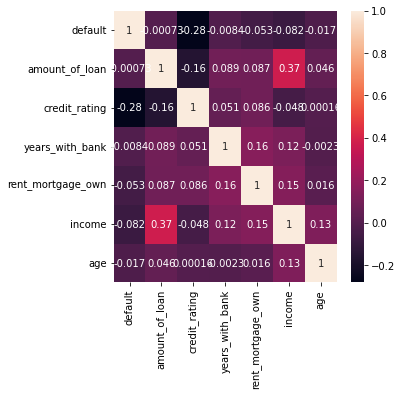

In [6]:
import seaborn as sns
plt.figure(figsize=(5,5))


sns.heatmap(df.corr(),annot=True)

In [7]:
df

,default,amount_of_loan,credit_rating,years_with_bank,rent_mortgage_own,income,age
0,0,1000,6,2.0,0,19200.0,24
1,1,6500,7,2.0,1,66000.0,28
2,0,2400,7,2.0,0,60000.0,36
3,0,10000,5,3.0,0,62000.0,24
4,1,4000,5,2.0,0,20000.0,28
...,...,...,...,...,...,...,...
7722,1,6000,5,6.0,0,47628.0,24
7723,1,1500,6,5.0,0,18000.0,21
7724,1,4100,6,18.0,0,57000.0,26
7725,1,2000,6,3.0,0,25000.0,25


In [8]:
# just make sure we have no null values
df.isnull().values.any()

True

In [9]:
df= df.dropna()

In [10]:
# separate out the features
features = list(df.columns[1:7])
features

['amount_of_loan',
 'credit_rating',
 'years_with_bank',
 'rent_mortgage_own',
 'income',
 'age']

In [11]:
# set our X and y
X = df[features]
y = df["default"]

# construct the tree
dec_tree = tree.DecisionTreeClassifier()
dec_tree = dec_tree.fit(X.values,y)
# had to add a .values to this code to avoid getting an error on predict
# because i did not label the input vector
# if I had labelled them, I could have used:
# dec_tree = dec_tree.fit(X,y)


#Shap values
Provide an indication of feature importance. More about this later.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


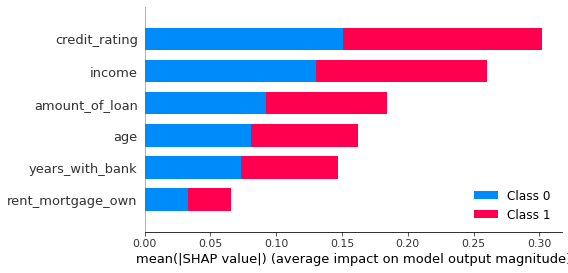

In [13]:
!pip install shap
import shap 
shap.initjs() 
explainer = shap.TreeExplainer(dec_tree, data=None) 
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, features=features)

- Results from the graphviz above indicate that credit rating and income have highest impact 

#Predict
Model to predict loan repayment given the features

In [14]:
# amount of loan, credit rating, years_with bank, rent_mogage_own, income, age
print (dec_tree.predict([[2000, 7, 1, 0, 60000, 21]]))


[1]


# Train Test


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier



In [16]:

# create a list of regression models to try
models = [LinearRegression(), GaussianNB(), DecisionTreeClassifier(),LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), SGDClassifier(), SVC(), BayesianRidge(), KernelRidge(),  KNeighborsClassifier(),XGBClassifier(), LGBMClassifier(),KMeans()]
models

[LinearRegression(),
 GaussianNB(),
 DecisionTreeClassifier(),
 LogisticRegression(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 SGDClassifier(),
 SVC(),
 BayesianRidge(),
 KernelRidge(),
 KNeighborsClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 LGBMCl

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7726 entries, 0 to 7726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   default            7726 non-null   int64  
 1   amount_of_loan     7726 non-null   int64  
 2   credit_rating      7726 non-null   int64  
 3   years_with_bank    7726 non-null   float64
 4   rent_mortgage_own  7726 non-null   int64  
 5   income             7726 non-null   float64
 6   age                7726 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 482.9 KB


In [33]:
def getMetrics(X,y,split_test_size):
    # predictor feature columns (F X m)
    X = X.values   

    #scale features, good for some algos
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # predicted class column (1 X m)
    y = y.values 

    Accuracy = []

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 

    print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
    print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))
    
    # loop through each model and train on the same training data
    print('We want low MSE and MAE and an R-squared as close to 1 as possible')
    for i in range(len(models)):
        print('\n'+ type(models[i]).__name__)
        models[i].fit(X_train, y_train)
        # make prediction on test set
        y_pred = models[i].predict(X_test)
        try:
          classifier_TT = models[i]
          classifier_TT.fit(X_train, y_train)
          y_pred = classifier_TT.predict(X_test)
          Accuracy.append(metrics.accuracy_score(y_test, y_pred))
          # report effectiveness of model
          # use MSE, MAE and R-2
          # (no confusion matrix, because we are predicting in a range and not classifying to a set)
          
          print('MSE: {0:.4f}'.format(mean_squared_error(y_test, y_pred)))
          print('MAE: {0:.4f}'.format(mean_absolute_error(y_test, y_pred)))
          print('R-squared: {0:.4f}'.format(r2_score(y_test, y_pred)))
          print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_pred)))

          cm = confusion_matrix(y_test, y_pred, labels=classifier_TT.classes_)
          disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier_TT.classes_)
          print('Prediction on test data:\n')
          disp.plot()
          plt.show()
        except Exception as e:
          print(models[i] ," does not apply ")
          
    return print("\nHighest accuracy is {0:.4f}".format(max(Accuracy))," produced by ", models[Accuracy.index(max(Accuracy))])

In [19]:
# set our X and y
X = df[['credit_rating','income','amount_of_loan','age']]
y = df["default"]

67.99% in training set
32.01% in test set
We want low MSE and MAE and an R-squared as close to 1 as possible

LinearRegression
LinearRegression()  does not apply 

GaussianNB
MSE: 0.3692
MAE: 0.3692
R-squared: -0.4783
Accuracy: 0.6308
Prediction on test data:



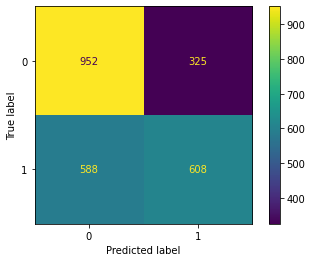

GaussianNB()  does not apply 

DecisionTreeClassifier
MSE: 0.4112
MAE: 0.4112
R-squared: -0.6467
Accuracy: 0.5888
Prediction on test data:



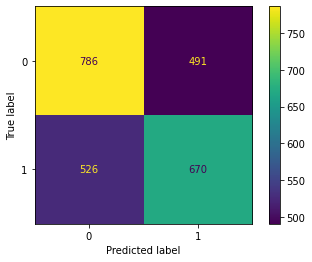

DecisionTreeClassifier()  does not apply 

LogisticRegression
MSE: 0.3748
MAE: 0.3748
R-squared: -0.5010
Accuracy: 0.6252
Prediction on test data:



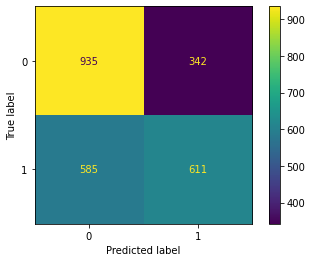

LogisticRegression()  does not apply 

RandomForestClassifier
MSE: 0.3744
MAE: 0.3744
R-squared: -0.4994
Accuracy: 0.6256
Prediction on test data:



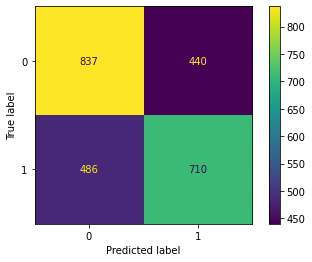

RandomForestClassifier()  does not apply 

GradientBoostingClassifier
MSE: 0.3704
MAE: 0.3704
R-squared: -0.4832
Accuracy: 0.6296
Prediction on test data:



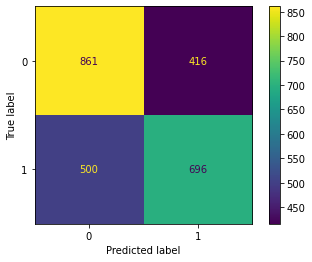

GradientBoostingClassifier()  does not apply 

SGDClassifier
MSE: 0.3736
MAE: 0.3736
R-squared: -0.4961
Accuracy: 0.6264
Prediction on test data:



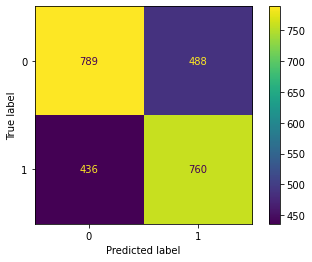

SGDClassifier()  does not apply 

SVC
MSE: 0.3611
MAE: 0.3611
R-squared: -0.4460
Accuracy: 0.6389
Prediction on test data:



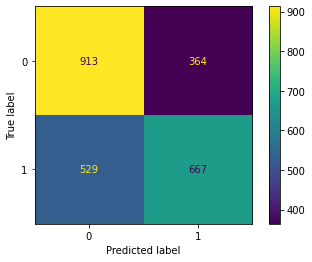

SVC()  does not apply 

BayesianRidge
BayesianRidge()  does not apply 

KernelRidge
KernelRidge()  does not apply 

KNeighborsClassifier
MSE: 0.4064
MAE: 0.4064
R-squared: -0.6273
Accuracy: 0.5936
Prediction on test data:



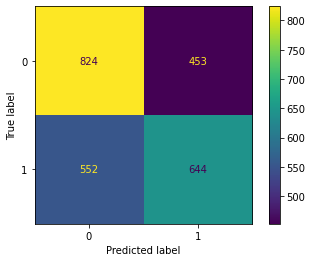

KNeighborsClassifier()  does not apply 

XGBClassifier
MSE: 0.3700
MAE: 0.3700
R-squared: -0.4816
Accuracy: 0.6300
Prediction on test data:



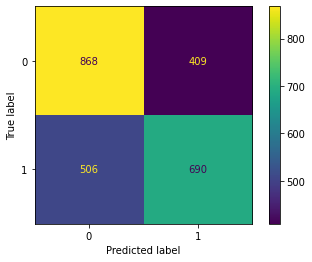

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)  does not apply 

LGBMClassifier
MSE: 0.3720
MAE: 0.3720
R-squared: -0.4897
Accuracy: 0.6280
Prediction on test data:



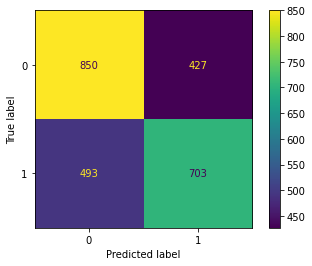

LGBMClassifier()  does not apply 

KMeans


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


MSE: 15.5200
MAE: 3.3858
R-squared: -61.1467
Accuracy: 0.0400
KMeans()  does not apply 

Highest accuracy is 0.6389  produced by  SGDClassifier()


In [20]:
getMetrics(X,y,0.32)

67.99% in training set
32.01% in test set
We want low MSE and MAE and an R-squared as close to 1 as possible

LinearRegression
LinearRegression()  does not apply 

GaussianNB
MSE: 0.3700
MAE: 0.3700
R-squared: -0.4816
Accuracy: 0.6300
Prediction on test data:



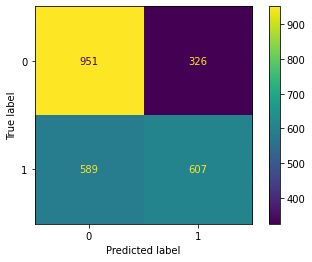


DecisionTreeClassifier
MSE: 0.3943
MAE: 0.3943
R-squared: -0.5787
Accuracy: 0.6057
Prediction on test data:



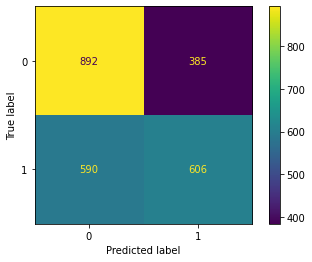


LogisticRegression
MSE: 0.3704
MAE: 0.3704
R-squared: -0.4832
Accuracy: 0.6296
Prediction on test data:



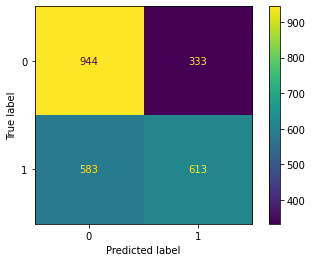


RandomForestClassifier
MSE: 0.3967
MAE: 0.3967
R-squared: -0.5884
Accuracy: 0.6033
Prediction on test data:



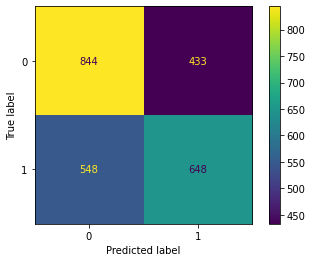


GradientBoostingClassifier
MSE: 0.3736
MAE: 0.3736
R-squared: -0.4961
Accuracy: 0.6264
Prediction on test data:



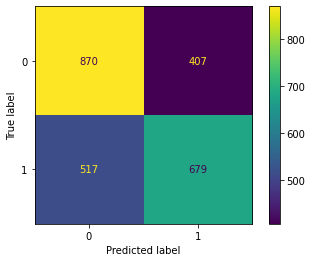


SGDClassifier
MSE: 0.3712
MAE: 0.3712
R-squared: -0.4864
Accuracy: 0.6288
Prediction on test data:



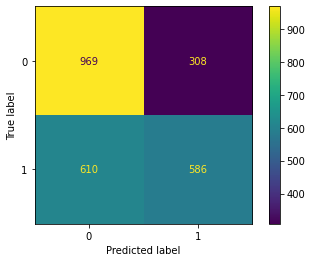


SVC
MSE: 0.3684
MAE: 0.3684
R-squared: -0.4751
Accuracy: 0.6316
Prediction on test data:



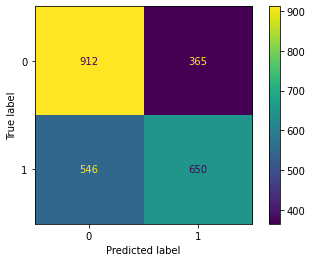


BayesianRidge
BayesianRidge()  does not apply 

KernelRidge
KernelRidge()  does not apply 

KNeighborsClassifier
MSE: 0.4193
MAE: 0.4193
R-squared: -0.6791
Accuracy: 0.5807
Prediction on test data:



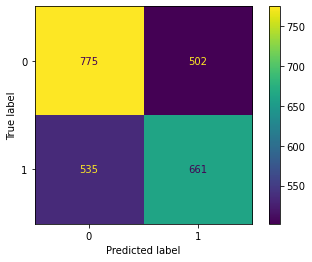


XGBClassifier
MSE: 0.3825
MAE: 0.3825
R-squared: -0.5318
Accuracy: 0.6175
Prediction on test data:



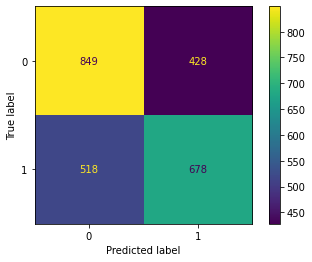


LGBMClassifier
MSE: 0.3813
MAE: 0.3813
R-squared: -0.5269
Accuracy: 0.6187
Prediction on test data:



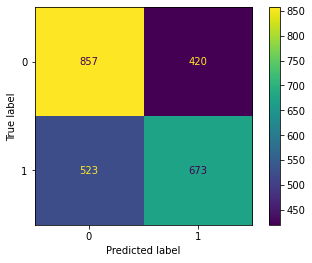


KMeans


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


MSE: 15.4201
MAE: 3.2123
R-squared: -60.7468
Accuracy: 0.0708
KMeans()  does not apply 

Highest accuracy is 0.6316  produced by  SGDClassifier()


In [47]:
# set our X and y
X = df[['credit_rating','income']]
y = df["default"]
getMetrics(X,y,0.32)

67.99% in training set
32.01% in test set
We want low MSE and MAE and an R-squared as close to 1 as possible

LinearRegression
LinearRegression()  does not apply 

GaussianNB
MSE: 0.3797
MAE: 0.3797
R-squared: -0.5204
Accuracy: 0.6203
Prediction on test data:



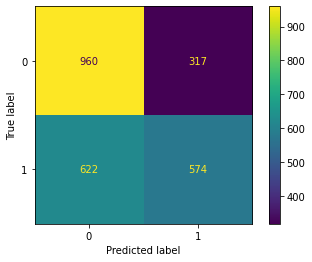


DecisionTreeClassifier
MSE: 0.4137
MAE: 0.4137
R-squared: -0.6564
Accuracy: 0.5863
Prediction on test data:



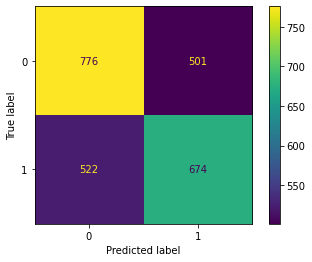


LogisticRegression
MSE: 0.3728
MAE: 0.3728
R-squared: -0.4929
Accuracy: 0.6272
Prediction on test data:



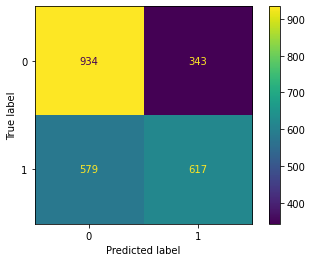


RandomForestClassifier
MSE: 0.3324
MAE: 0.3324
R-squared: -0.3310
Accuracy: 0.6676
Prediction on test data:



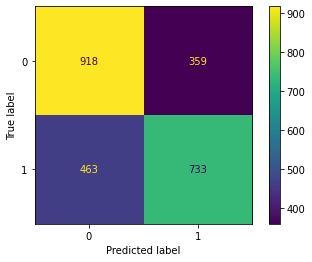


GradientBoostingClassifier
MSE: 0.3623
MAE: 0.3623
R-squared: -0.4508
Accuracy: 0.6377
Prediction on test data:



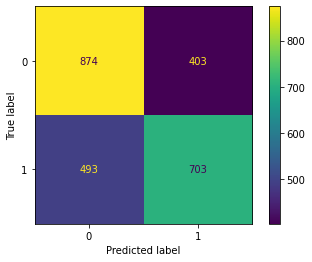


SGDClassifier
MSE: 0.3696
MAE: 0.3696
R-squared: -0.4800
Accuracy: 0.6304
Prediction on test data:



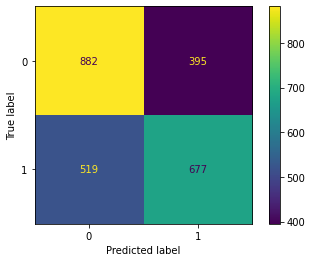


SVC
MSE: 0.3599
MAE: 0.3599
R-squared: -0.4411
Accuracy: 0.6401
Prediction on test data:



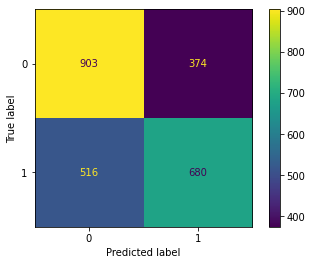


BayesianRidge
BayesianRidge()  does not apply 

KernelRidge
KernelRidge()  does not apply 

KNeighborsClassifier
MSE: 0.3910
MAE: 0.3910
R-squared: -0.5658
Accuracy: 0.6090
Prediction on test data:



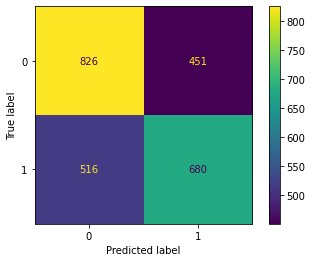


XGBClassifier
MSE: 0.3457
MAE: 0.3457
R-squared: -0.3844
Accuracy: 0.6543
Prediction on test data:



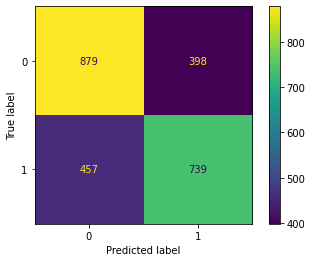


LGBMClassifier
MSE: 0.3506
MAE: 0.3506
R-squared: -0.4039
Accuracy: 0.6494
Prediction on test data:



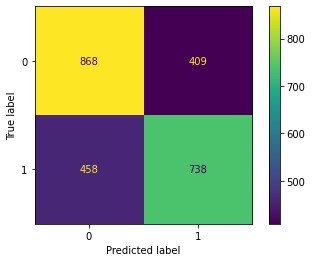


KMeans


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


MSE: 10.8047
MAE: 2.5977
R-squared: -42.2652
Accuracy: 0.1342
KMeans()  does not apply 

Highest accuracy is 0.6676  produced by  LogisticRegression()


In [46]:
# set our X and y
X = df[features]
y = df["default"]
getMetrics(X,y,0.32)

# My highest accuracy was 0.6676 produces by LogisticRegression 
- perform cross validation using logistic regression

#Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std
from scipy.stats import sem
from matplotlib import pyplot

In [28]:
# create a random dataset
# more info at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

print(X.shape, y.shape)

(7726, 4) (7726,)


In [34]:
n_splits= 10
# k-fold

# set the parameters
# feel free to play with these
cv = KFold(n_splits, random_state=1, shuffle=True)
# create model
model = SGDClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance


print('Accuracy:', mean(scores))

Accuracy: 0.4964973959206107


In [35]:
# repeated k-fold

# set the parameters
# feel free to play with these
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance

print('Accuracy:', mean(scores))

Accuracy: 0.562644866578635


In [42]:
# function to evaluate performance, used below
def evaluate_model(X, y, repeats):
 # prepare the cross-validation procedure
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 # create model
 model = SGDClassifier()
 # evaluate model
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores

>1 mean=0.5097 se=0.009
>2 mean=0.5129 se=0.007
>3 mean=0.5142 se=0.005
>4 mean=0.5080 se=0.005
>5 mean=0.5061 se=0.004
>6 mean=0.5008 se=0.004
>7 mean=0.5089 se=0.004
>8 mean=0.5077 se=0.004
>9 mean=0.5112 se=0.003
>10 mean=0.5094 se=0.003
>11 mean=0.5088 se=0.003
>12 mean=0.5040 se=0.003
>13 mean=0.5084 se=0.003
>14 mean=0.5050 se=0.003
>15 mean=0.5050 se=0.003
>16 mean=0.5059 se=0.002


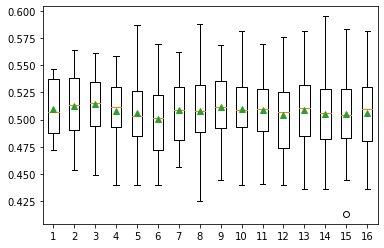

In [44]:
# configurations to test
repeats = range(1,17)
results = list()

for r in repeats: 
  # evaluate using a given number of repeats
  scores = evaluate_model(X, y, r)
  # summariz
  print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
  # store
  results.append(scores)
  
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

# as we go the standard error, averaged, should get somewhat better

#Grid Search

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV


In [57]:
def GridSearch(model):
    # entropy is another splitting metric like Gini, if you want to try that one, just uncomment the right line
    rf_class = model
    #rf_class = RandomForestClassifier(criterion='gini')

    # Create the parameter grid - the list of values to try
    # change these if you like
    # looking at docs, auto and sqrt seem to be the same ¯\_(ツ)_/¯
    param_grid = {'max_depth':[2, 4, 8, 15],'max_features':['auto', 'sqrt', 'log2']
    }

    # roc_auc is "area under the curve" error evaluation
    # it calculates the probability that the model ranks a random positive example more highly than a random negative example.
    # AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0
    # one whose predictions are 100% correct has an AUC of 1.0.
    #
    # n_jobs is the jobs to run in parallel
    # cv is the k-fold cross validation strategy - the k
    # 
    grid_rf_class = GridSearchCV(estimator=rf_class, param_grid=param_grid, scoring='roc_auc', n_jobs=4, cv=5, refit=True, return_train_score=True)
    # display the configuration
    #print(grid_rf_class)
    grid_rf_class.fit(X, y)

    # Read the cv_results property into adataframe & print it out

    # Print the best parameters and score
    print("Best parameters: ", grid_rf_class.best_params_)
    print("Best score: {:.2f}".format(grid_rf_class.best_score_))

In [59]:
GridSearch(RandomForestClassifier())

Best parameters:  {'max_depth': 4, 'max_features': 'log2'}
Best score: 0.68


#Multivariate Regression

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7726 entries, 0 to 7726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   default            7726 non-null   int64  
 1   amount_of_loan     7726 non-null   int64  
 2   credit_rating      7726 non-null   int64  
 3   years_with_bank    7726 non-null   float64
 4   rent_mortgage_own  7726 non-null   int64  
 5   income             7726 non-null   float64
 6   age                7726 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 482.9 KB


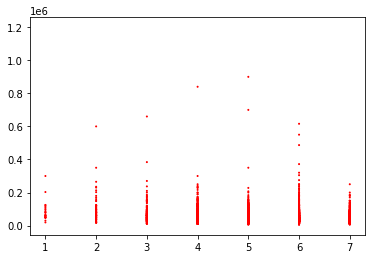

In [22]:
# let's do some scatter plots for some of the relationships
plt.scatter(df['credit_rating'], df['income'],df['default'], color='red')

In [23]:
# separate out X and y values to model

# the independent variables - the "causes"
X_values = df[['credit_rating','income']].values

# the dependent variable - the "effect"
y_values = df['default'].values

In [24]:
# let's use skikitlearn for our regression again
from sklearn.preprocessing import PolynomialFeatures
# set the polynomial degree
degree=2

# create the model object
poly_model = PolynomialFeatures(degree=degree)

# transform out polynomial features - the initial values
poly_x_values = poly_model.fit_transform(X_values)

# the beginning coefficients, in the form [1, a, b, a^2, ab, b^2]
print(f'initial values {X_values[0]}\nMapped to {poly_x_values[0]}')

initial values [6.00e+00 1.92e+04]
Mapped to [1.0000e+00 6.0000e+00 1.9200e+04 3.6000e+01 1.1520e+05 3.6864e+08]


In [25]:
# let's use MSE to measure the fit
from sklearn.metrics import mean_squared_error

# fit the model
poly_model.fit(poly_x_values, y_values)
# create an instance of the linear regression base class
regression_model = LinearRegression()
# fit the model to the inputs (poly_x_values) and target (y_values)
regression_model.fit(poly_x_values, y_values)
# generate predictions on the input data
y_pred = regression_model.predict(poly_x_values)
# find the coefficients of the model (the relationship between input data and )
print(regression_model.coef_)

# calculate the MSE of the model (with the degree set above)
MSE = mean_squared_error(y_values, y_pred, squared=False)

print('\nWith a multi-variate regression model of degree', degree, ', the MSE is' ,MSE)

[ 0.00000000e+00  7.21665200e-02 -6.37776906e-08 -1.59920677e-02
 -3.65712792e-07  2.41993925e-12]

With a multi-variate regression model of degree 2 , the MSE is 0.4739532734558362


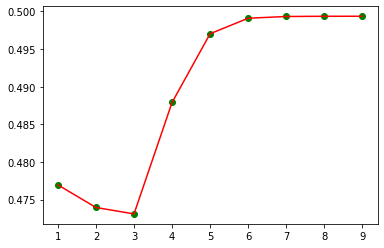

In [26]:
# check accuracy for each degree
number_degrees = [1,2,3,4,5,6,7,8,9]
plt_mean_squared_error = []
for degree in number_degrees:
   poly_model = PolynomialFeatures(degree=degree)
   poly_x_values = poly_model.fit_transform(X_values)
   poly_model.fit(poly_x_values, y_values)
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_pred = regression_model.predict(poly_x_values)
   plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

- Accuracy levels recorded are lower than my previous models